In [1]:
import numpy as np
from scipy import stats
import matplotlib as mpl
%matplotlib inline

from matplotlib import pyplot as plt
from matplotlib.font_manager import FontProperties
import independence_nn
from scipy.interpolate import interp1d
import experiment_basic
from experiment_basic import make_mdn_data

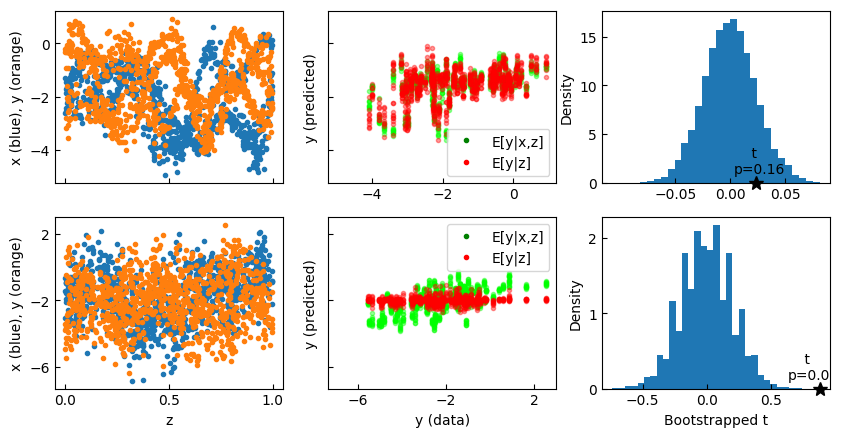

In [70]:
""" Fig. 1: Walk-through of the independence 
tester working on the Chaos dataset."""
import independence_nn
reload(independence_nn)
N_SAMPLES = 1000
MAX_TIME = 60
np.random.seed(1)
mpl.rc("savefig", dpi=100)


#=====================================================
# Make data such that x is independent of y given z.
#=====================================================
# x_i, y_i, z_i = make_mdn_data(n_samples=N_SAMPLES, type='indep')
# (pval_i, _, _, x_z_i, d1_preds_i, d0_preds_i,
#  d1_stats_i, d0_stats_i, t_obs_i, t_star_i, n_test_i) = independence_nn.indep_nn(
#     x_i, y_i, z_i, max_time=MAX_TIME, plot_return=True)

# Plot x, y, and the prediction that uses z.
plt.figure(figsize=(10, 5.), facecolor='white')
font = FontProperties()


ax=plt.subplot(2, 3, 1)
ax.get_yaxis().set_tick_params(direction='in')
ax.get_xaxis().set_tick_params(direction='in')
plt.ylabel('x (blue), y (orange)')
plt.xticks([0, .5, 1], [])
plt.yticks([-4, -2, 0])
plt.plot(z_i, x_i, '.', z_i, y_i, '.')
ylim = ax.get_ylim()

ax=plt.subplot(2, 3, 2)
ax.get_yaxis().set_tick_params(direction='in')
ax.get_xaxis().set_tick_params(direction='in')
for y_pred_id, y_pred in enumerate(d1_preds_i):
    plt.plot(y_i[:n_test_i], y_pred, 'g.', color=(0, 1, 0, .4))
plt.plot(y_i[:n_test_i], y_pred * np.nan, 'g.', label='E[y|x,z]')
for y_pred_id, y_pred in enumerate(d0_preds_i):
    plt.plot(y_i[:n_test_i], y_pred, 'r.', color=(1, 0, 0, .4))
plt.plot(y_i[:n_test_i], y_pred * np.nan, 'r.', label='E[y|z]')
plt.legend(loc=0)
plt.ylim(ylim)
plt.xlim(ylim)
plt.yticks([-4, -2, 0], [])
plt.ylabel('y (predicted)')


ax=plt.subplot(2, 3, 3)
ax.get_yaxis().set_tick_params(direction='in')
ax.get_xaxis().set_tick_params(direction='in')
plt.hist(t_star_i, bins=30, normed=True)
plt.ylabel('Density')
plt.xticks([-.05, 0, .05])
plt.yticks([0, 5, 10, 15])
#plt.plot(d0_stats_i, np.zeros_like(d0_stats_i), 'rx',
#         label=r'mse[y|x]$', clip_on=False, ms=7)
#plt.plot(d1_stats_i, np.zeros_like(d1_stats_i), 'gx',
#         label='mse[y|x,z]', clip_on=False, ms=7)
plt.plot(t_obs_i, [0], 'k*', ms=10, clip_on=False)
font.set_weight('heavy')
plt.text(t_obs_i-.02, 1, '    t\np={:.2g}'.format(pval_i))#, fontproperties=font)


#=====================================================
# Make data such that x is dependent on y given z.
#=====================================================
# x_d, y_d, z_d = make_mdn_data(n_samples=N_SAMPLES, type='dep')
# (pval_d, _, _, x_z_d, d1_preds_d, d0_preds_d,
#  d1_stats_d, d0_stats_d, t_obs_d, t_star_d, n_test_d) = independence_nn.indep_nn(
#     x_d, y_d, z_d, max_time=MAX_TIME, plot_return=True)

# Plot x, y, and the prediction that uses z.
ax=plt.subplot(2, 3, 4)
ax.get_yaxis().set_tick_params(direction='in')
ax.get_xaxis().set_tick_params(direction='in')
plt.xlabel('z')
plt.ylabel('x (blue), y (orange)')
plt.plot(z_d, x_d, '.', z_d, y_d, '.')
plt.xticks([0, .5, 1])
plt.yticks([-6, -2, 2])
ylim = ax.get_ylim()


ax=plt.subplot(2, 3, 5)
ax.get_yaxis().set_tick_params(direction='in')
ax.get_xaxis().set_tick_params(direction='in')
plt.xlabel('y (data)')
plt.ylabel('y (predicted)')
plt.ylim(ylim)
plt.xlim(ylim)
plt.yticks([-6, -2, 2], [])
plt.xticks([-6, -2, 2])
for y_pred_id, y_pred in enumerate(d1_preds_d):
    plt.plot(y_d[:n_test_d], y_pred, 'g.', color=(0, 1, 0, .4))
plt.plot(y_d[:n_test_d], y_pred * np.nan, 'g.', label='E[y|x,z]')
for y_pred_id, y_pred in enumerate(d0_preds_d):
    plt.plot(y_d[:n_test_d], y_pred, 'r.', color=(1, 0, 0, .4))
plt.plot(y_d[:n_test_d], y_pred * np.nan, 'r.', label='E[y|z]')
plt.legend(loc=0)


ax=plt.subplot(2, 3, 6)
ax.get_yaxis().set_tick_params(direction='in')
ax.get_xaxis().set_tick_params(direction='in')
plt.xlabel('Bootstrapped t')
plt.ylabel('Density')
plt.yticks([0, 1, 2])
plt.hist(t_star_d, bins=30, normed=True)
# plt.plot(d0_stats_d, np.zeros_like(d0_stats_d), 'rx',
#         label=r'mse[y|x]$', clip_on=False, ms=7)
# plt.plot(d1_stats_d, np.zeros_like(d1_stats_d), 'gx',
#         label='mse[y|x,z]', clip_on=False, ms=7)
plt.plot(t_obs_d, [0], 'k*', ms=10, clip_on=False)
font.set_weight('heavy')
plt.text(t_obs_d-.25, .12, '    t\np={}'.format(pval_d))#, fontproperties=font)



plt.show()

In [4]:
pval_i

0.15570000000000001